In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import sklearn
from skfeature.function.similarity_based import fisher_score
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score


In [37]:
#Extracting the data from CSV
df = pd.read_csv("C:\\Users\\shiva\\OneDrive\\Desktop\\Project_resume\\ML_projext\\testing\\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df = df.drop("customerID",axis = 1)
df.head()

In [39]:
#some other values is missing other than nan
def custom_missing_val(df):
  custom_miss = {}
  for i in df.columns:
      pd_series = df[i]
      check = ' '
      array_np = np.array(pd_series)
      out = np.any(pd_series==check)
      if out ==True:
        custom_miss[i] = out
  return  custom_miss

#calling the function
missing_col= custom_missing_val(df)
print("the result are ",missing_col)

{'TotalCharges': True}

In [40]:
#handling the custom values by replacing with mode
missing_idx = df[df["TotalCharges"]==' '].index.values
mode_val = df[["TotalCharges"]].mode()
b = mode_val.iloc[1,0]
for i in missing_idx:
  df.loc[i,"TotalCharges"] = b

#Checking any missing value
print(custom_missing_val(df))


{}


In [ ]:
#checking the datatype of the column and missing values
df.info()

In [41]:
#lets check the shape of the dataframe and change the datatype
print(f"the shape of the dataset is {df.shape}")
df.TotalCharges = df.TotalCharges.astype('float64')
type(df.TotalCharges)

the shape of the dataset is (7043, 20)


In [46]:
#segerate the list based on the data type 
def segregate_dtype(df):
  num_col = []
  cat_col = []
  for i,j in zip(df.dtypes,df.columns):
    if i=="object":
      cat_col.append(j)
    else:
      num_col.append(j)
  return cat_col,num_col

#calling the function 
cat_col,num_col = segregate_dtype(df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

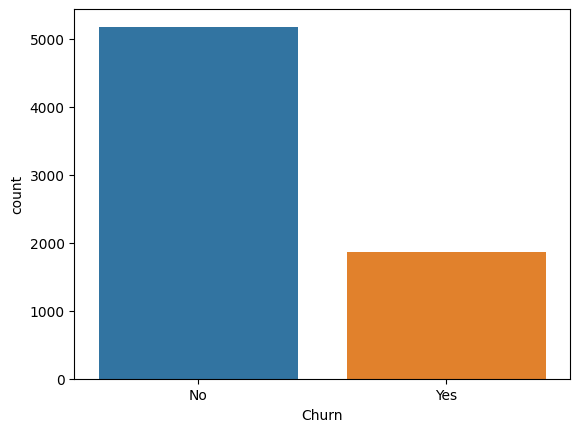

In [47]:
#check the class imbalance
sns.countplot(x = df['Churn'],data = df)

In [48]:
#convert the categorical values to numeric values
df_feature = pd.get_dummies(data = df,columns = cat_col, drop_first = True)
label = df_feature[['Churn_Yes']]
feature = df_feature.drop('Churn_Yes',axis = 1)
feature.head()


c:\Users\shiva\miniconda3\envs\mlproject\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


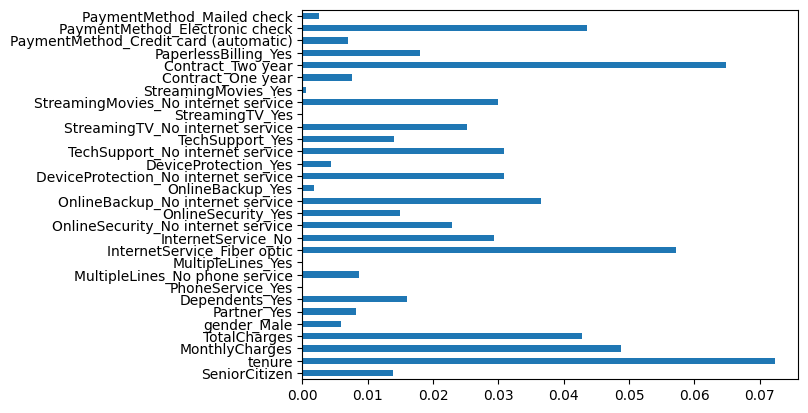

In [53]:
#find out the important features of the dataset
from sklearn.feature_selection import mutual_info_classif
importance = mutual_info_classif(feature,label)
feature_imp = pd.Series(importance,feature.columns[0:len(feature.columns)])
feature_imp.plot(kind = "barh")
plt.show()

In [80]:
#Obtained the indexes based on two different threshold
indx = np.where(feature_imp>0.01)[0]
indx3 = np.where(feature_imp>0.005)[0]

<AxesSubplot:xlabel='Churn_Yes', ylabel='count'>

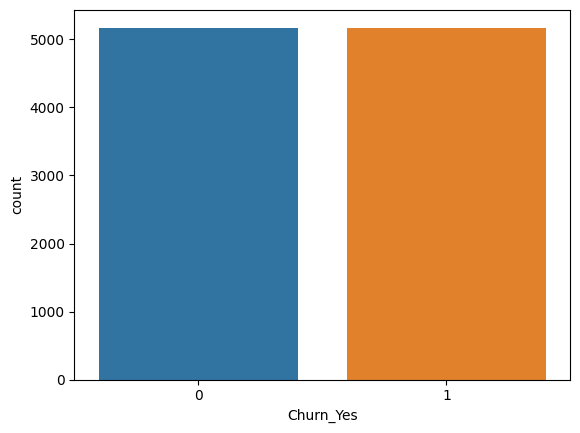

In [15]:
#generate the synthetic data using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X,Y = smote.fit_resample(feature,label)

#After using SMOTE
sns.countplot(x = Y["Churn_Yes"])

c:\Users\shiva\miniconda3\envs\mlproject\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


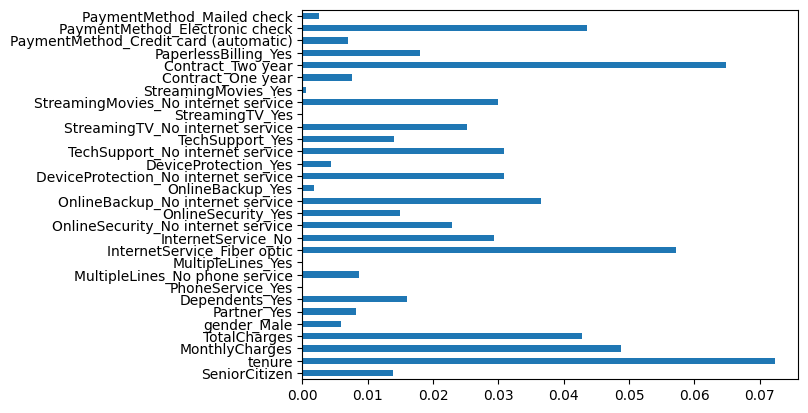

In [74]:
#Checking the effect of SMOTE on feature important 
importance1 = mutual_info_classif(feature,label)
feature_imp1 = pd.Series(importance,feature.columns[0:len(feature.columns)])
feature_imp1.plot(kind = "barh")
plt.show()

In [16]:
#Normailzation the dataset
from sklearn.preprocessing import MinMaxScaler
feature = X.columns.values  #gives the column name
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X)
x = pd.DataFrame(scaler.transform(X),columns = feature)
x.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.013889,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.472222,0.385075,0.215867,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.027778,0.354229,0.010310,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.625000,0.239303,0.210241,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.027778,0.521891,0.015330,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [81]:
#extracting the data based on the index
imp_x = x.iloc[:,indx]
imp_x3 = x.iloc[:,indx]

In [82]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test  =  train_test_split(x,Y,test_size=0.3, random_state=41)
#creating a new dataset with important features
X_train2,X_test2,Y_train2,Y_test2  =  train_test_split(imp_x,Y,test_size=0.3, random_state=41)
#creating a new dataset with important features 
X_train3,X_test3,Y_train3,Y_test3  =  train_test_split(imp_x3,Y,test_size=0.3, random_state=41)

In [ ]:
# Training the Logistic Regression
model1 = LogisticRegression(solver = "lbfgs",max_iter= 300,warm_start = True,n_jobs = -1)
model_fit1 = model1.fit(X_train,Y_train)

model2 = LogisticRegression(solver = "lbfgs",max_iter= 300,warm_start = True,n_jobs = -1)
model_fit2 = model2.fit(X_train2,Y_train2)

model2 = LogisticRegression(solver = "lbfgs",max_iter= 300,warm_start = True,n_jobs = -1)
model_fit2 = model2.fit(X_train3,Y_train3)


In [84]:
#evaluating the model
predict1 = model_fit1.predict(X_test)

predict2 = model_fit2.predict(X_test2)

predict3 = model_fit2.predict(X_test3)

print("for model1", accuracy_score(Y_test,predict1))

print("for model2", accuracy_score(Y_test2,predict2))

print("for model3", accuracy_score(Y_test3,predict3))

for model1 0.8315619967793881
for model2 0.7964573268921095
for model2 0.7964573268921095


In [119]:
# #Parameter tunuing for logistic regression
# from sklearn.model_selection import  GridSearchCV
# lr = LogisticRegression()
# param = {"solver": ["lbfgs","liblinear","sag"]}
# grid = GridSearchCV(lr,param_grid=param,n_jobs=-1,refit = True)
# grid.fit(X_train,Y_train)

c:\Users\shiva\miniconda3\envs\mlproject\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'solver': ['lbfgs', 'liblinear', 'sag']})

In [ ]:
#Traning the Random Forest Classifer 
from sklearn.ensemble import RandomForestClassifier
model_r1 = RandomForestClassifier(n_jobs=-1,criterion="gini").fit(X_train,Y_train)

model_r2 = RandomForestClassifier(n_jobs=-1,criterion="gini").fit(X_train2,Y_train2)

model_r3 = RandomForestClassifier(n_jobs=-1,criterion="gini").fit(X_train3,Y_train3)


In [87]:
#Evaluating the random forest
predict1 = model_r1.predict(X_test)

predict2 = model_r2.predict(X_test2)

predict3 = model_r3.predict(X_test3)

print("for model1", accuracy_score(Y_test,predict1))

print("for model2", accuracy_score(Y_test2,predict2))

print("for model3", accuracy_score(Y_test3,predict3))

for model1 0.8447665056360708
for model2 0.8151368760064412
for model3 0.8144927536231884


In [116]:
#Trainig the Support Vector Machine
from sklearn import svm
model_s1 = svm.SVC(kernel="linear",C=0.001,gamma=0.0001).fit(X_train,Y_train)

model_s2 = svm.SVC(kernel="linear",C=0.001,gamma=0.0001).fit(X_train2,Y_train2)

model_s3 = svm.SVC(kernel="linear",C=0.001,gamma=0.0001).fit(X_train3,Y_train3)

c:\Users\shiva\miniconda3\envs\mlproject\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\shiva\miniconda3\envs\mlproject\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\shiva\miniconda3\envs\mlproject\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [117]:
predict1 = model_s1.predict(X_test)

predict2 = model_s2.predict(X_test2)

predict3 = model_s3.predict(X_test3)

print("for model1", accuracy_score(Y_test,predict1))

print("for model2", accuracy_score(Y_test2,predict2))

print("for model3", accuracy_score(Y_test3,predict3))

for model1 0.8022544283413848
for model2 0.7713365539452496
for model3 0.7713365539452496


In [ ]:
#parameter tuning for SVM
param_grid = {'C':[0.1,1,10,100,1000],
'gamma':[1,0.1,0.01,0.001,0.0001],
'kernel':['rbf','linear','sigmoid']}
model = svm.SVC()
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train,Y_train)

In [102]:
#obtained the best set of paramenter for SVM
print("the best parameter" ,grid.best_params_)
print("the best score " ,grid.best_score_)


the best parameter {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
the best parameter 66
the best parameter 0.8341855118218318
